In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,6)

In [51]:
df = pd.read_excel('./Copy of loan.xlsx')

In [52]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [53]:
df.shape

(614, 13)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [55]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [56]:
for ct in df.select_dtypes(include='object'):
    print(df[ct].value_counts(normalize=True))
    print('\n\n\n')

LP001002    0.001629
LP002328    0.001629
LP002305    0.001629
LP002308    0.001629
LP002314    0.001629
              ...   
LP001692    0.001629
LP001693    0.001629
LP001698    0.001629
LP001699    0.001629
LP002990    0.001629
Name: Loan_ID, Length: 614, dtype: float64




Male      0.813644
Female    0.186356
Name: Gender, dtype: float64




Yes    0.651391
No     0.348609
Name: Married, dtype: float64




0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64




Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64




No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64




Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64




Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64






In [57]:
# missing values

In [58]:
df.isnull().sum()*len(df)/100

Loan_ID                0.00
Gender                79.82
Married               18.42
Dependents            92.10
Education              0.00
Self_Employed        196.48
ApplicantIncome        0.00
CoapplicantIncome      0.00
LoanAmount           135.08
Loan_Amount_Term      85.96
Credit_History       307.00
Property_Area          0.00
Loan_Status            0.00
dtype: float64

In [59]:
# Let's fill the missing values.

In [60]:
# Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History

In [61]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [62]:
# Again check for missing values.

In [63]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [138]:
# Let's separate the categorical and numerical variables.

In [64]:
cat = df.select_dtypes(include='object')
num = df.select_dtypes(include=np.number)

In [140]:
# Let's perform the visualization, univariate, bivariate, multivariate

<Figure size 500x400 with 0 Axes>

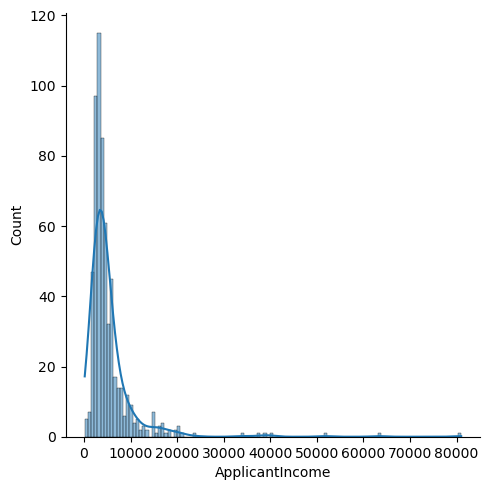

<Figure size 500x400 with 0 Axes>

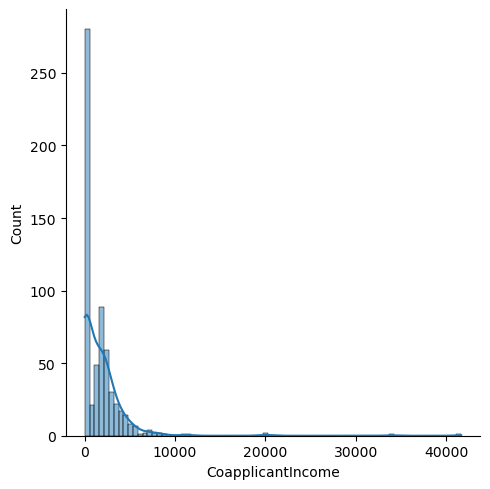

<Figure size 500x400 with 0 Axes>

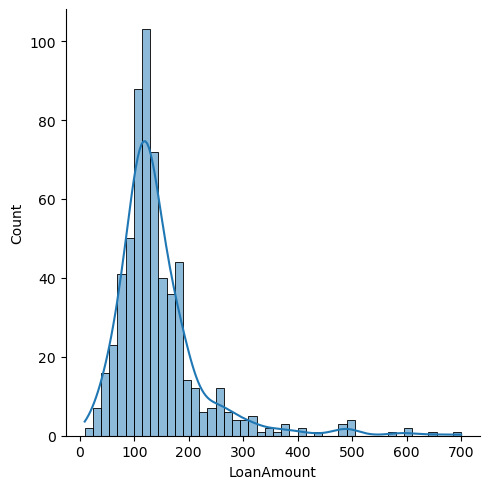

<Figure size 500x400 with 0 Axes>

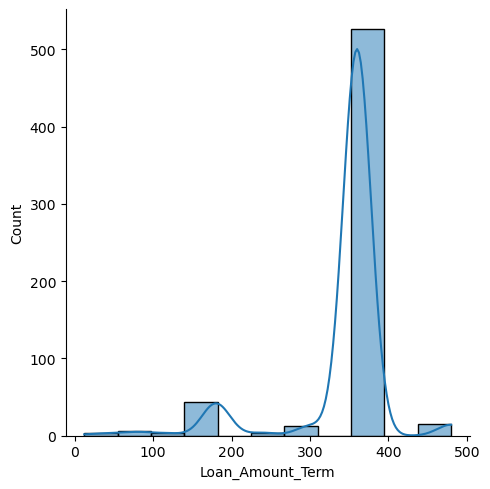

<Figure size 500x400 with 0 Axes>

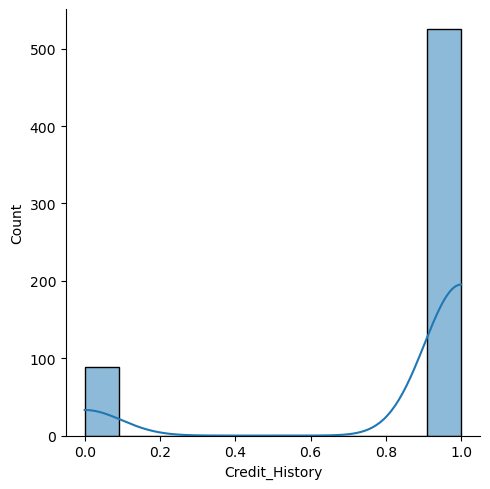

In [66]:
for hist in num.columns:
        plt.figure(figsize=(5,4))
        sns.displot(num[hist], kde=True)
        plt.show()



In [90]:
# Box plot to check the extend of outliers.

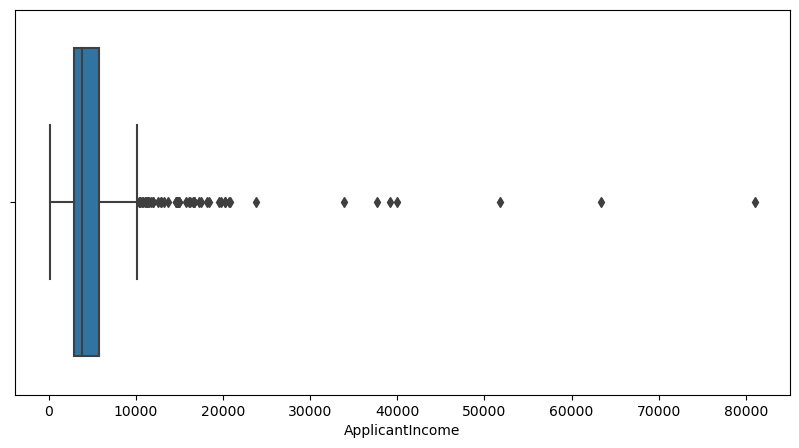

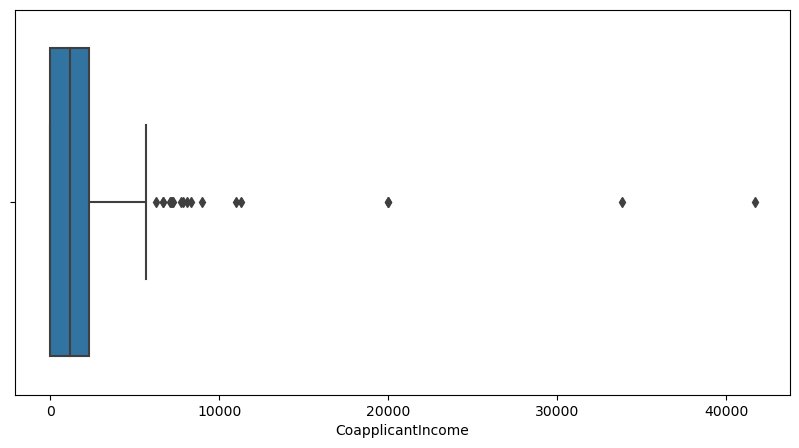

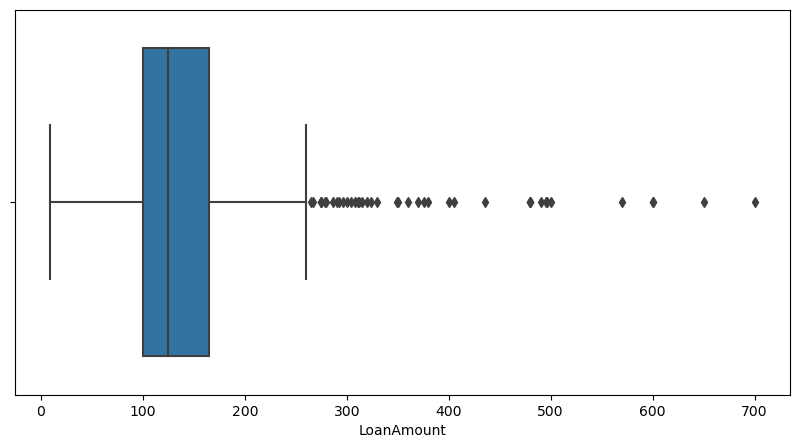

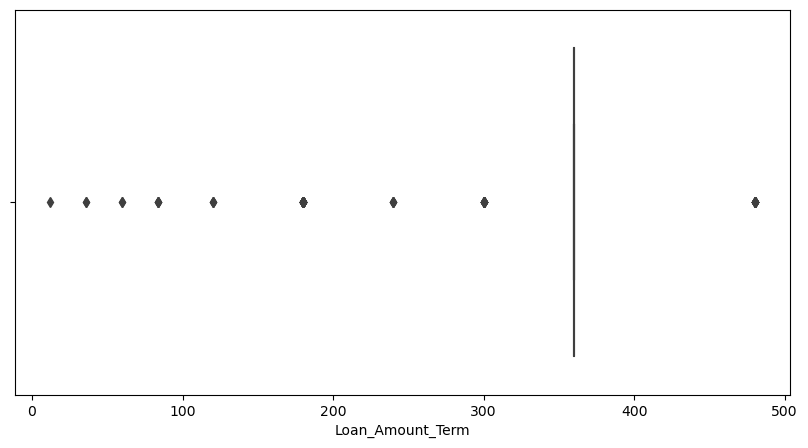

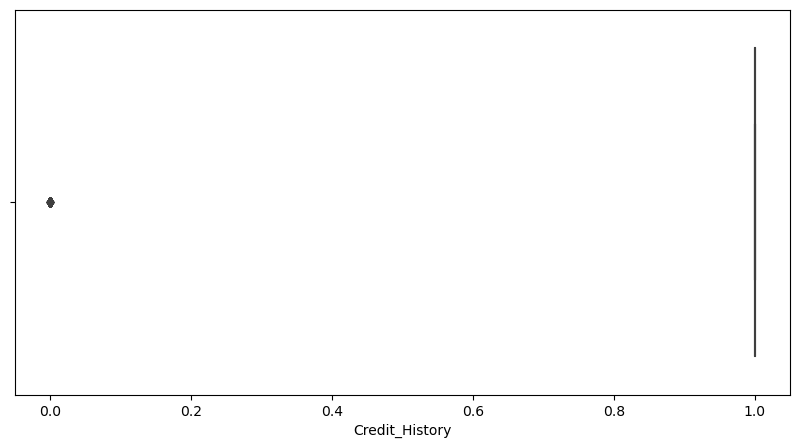

In [17]:
for box in num.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(num[box])
    plt.show()

In [92]:
# Bi variate analysis

In [67]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

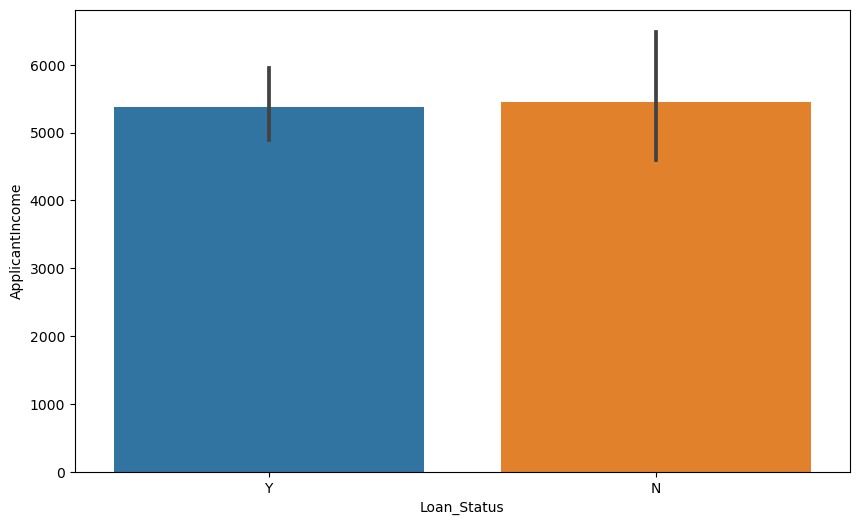

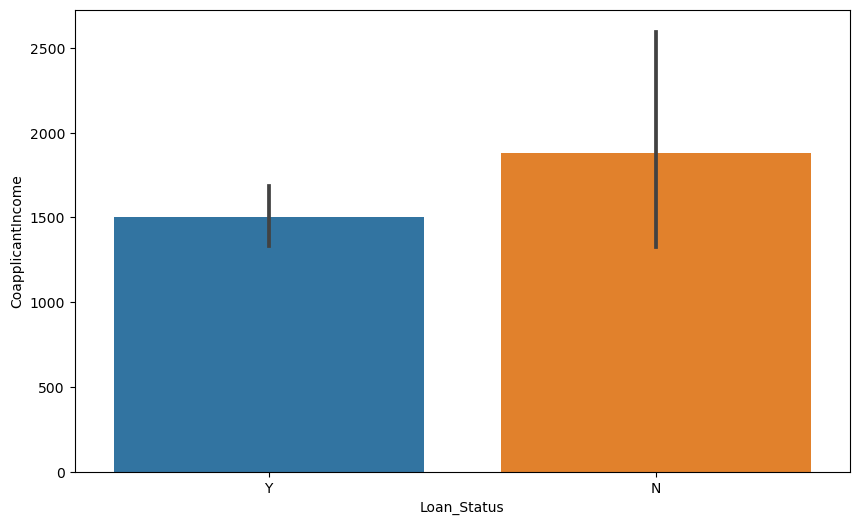

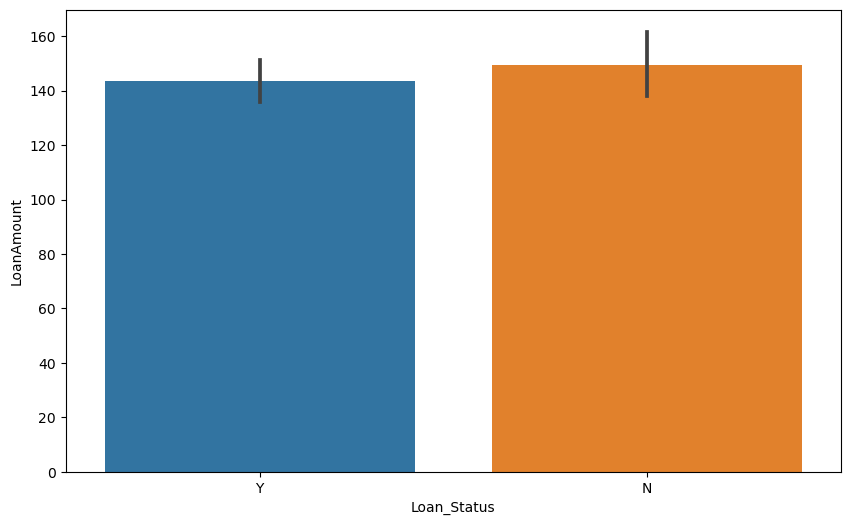

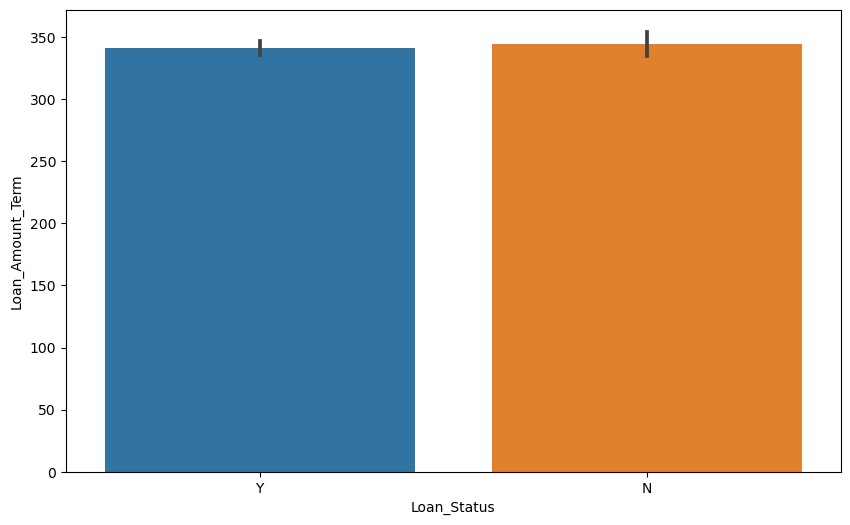

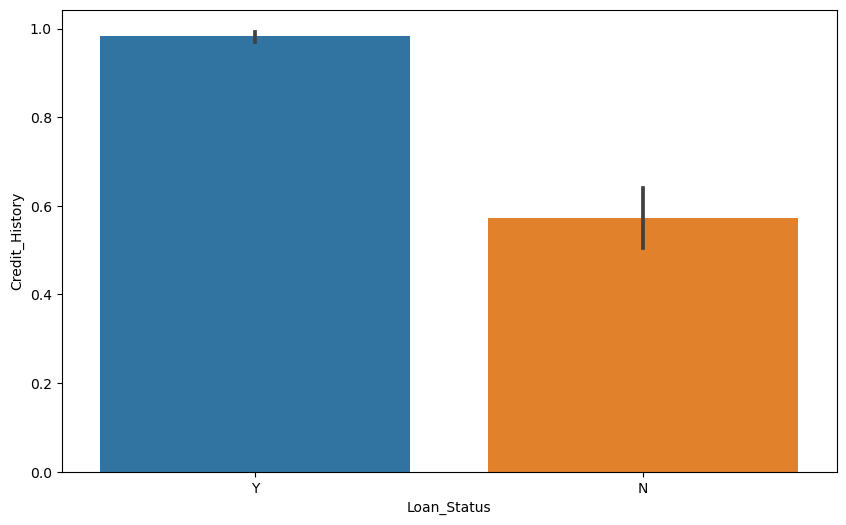

In [68]:
for bar in num.columns:
    plt.figure(figsize=(10,6))
    sns.barplot(x=cat['Loan_Status'], y=num[bar])
    plt.show()

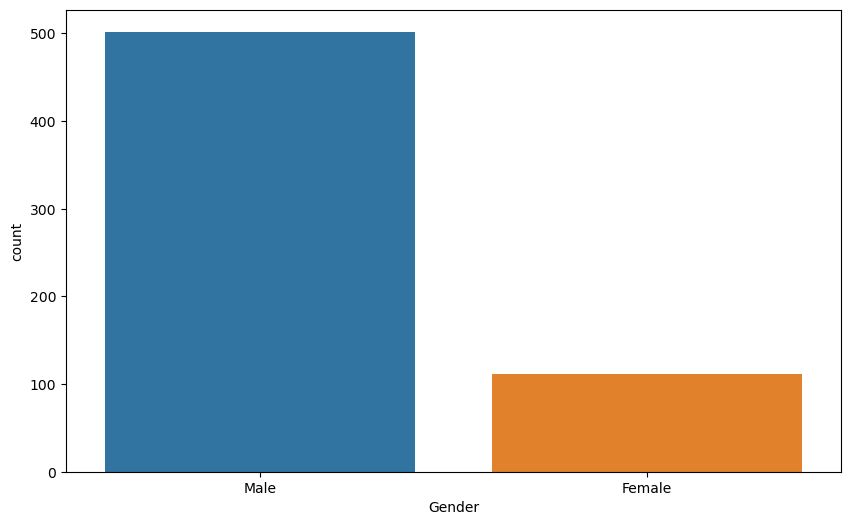

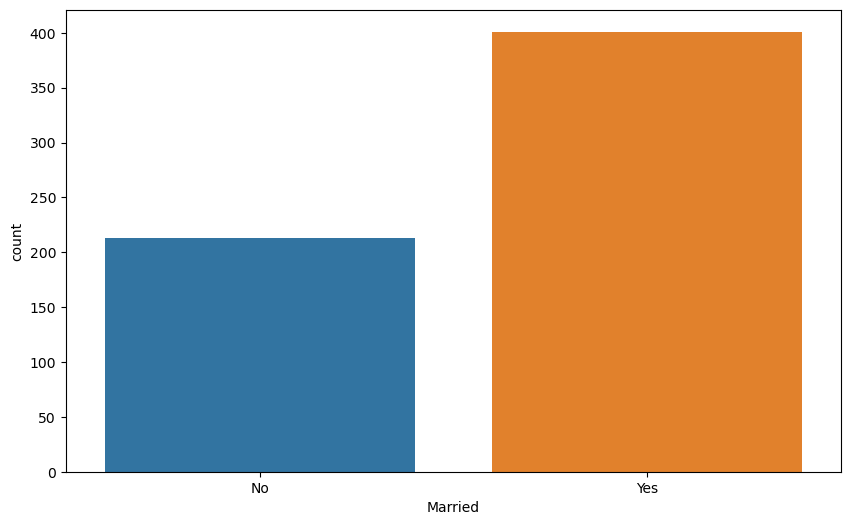

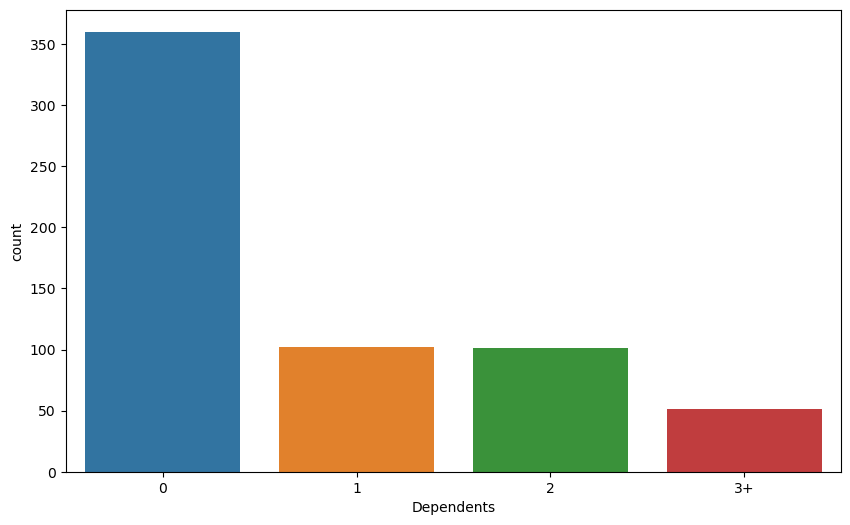

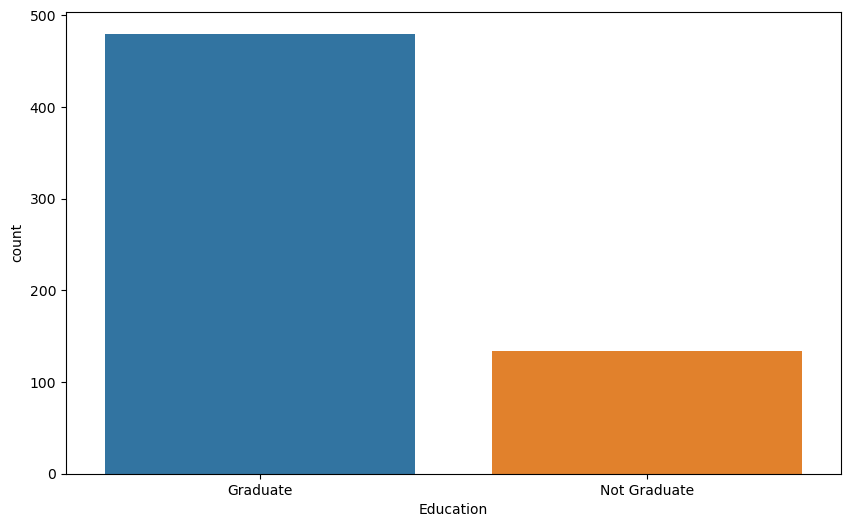

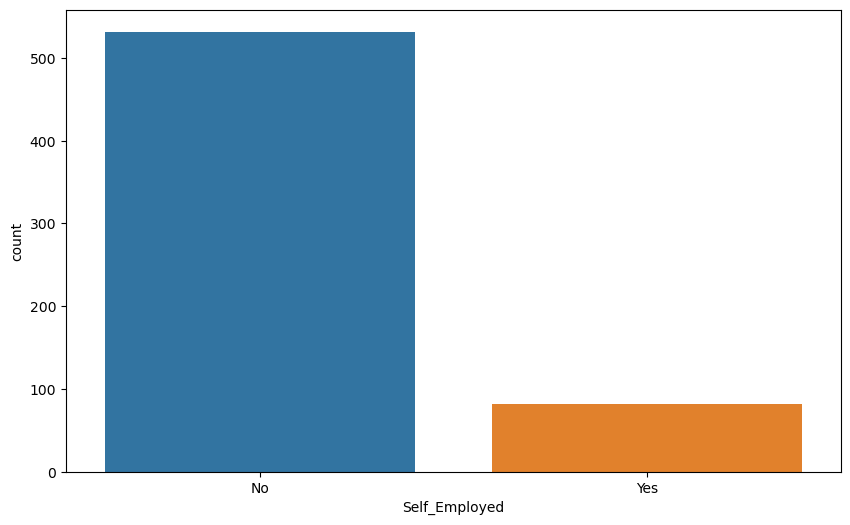

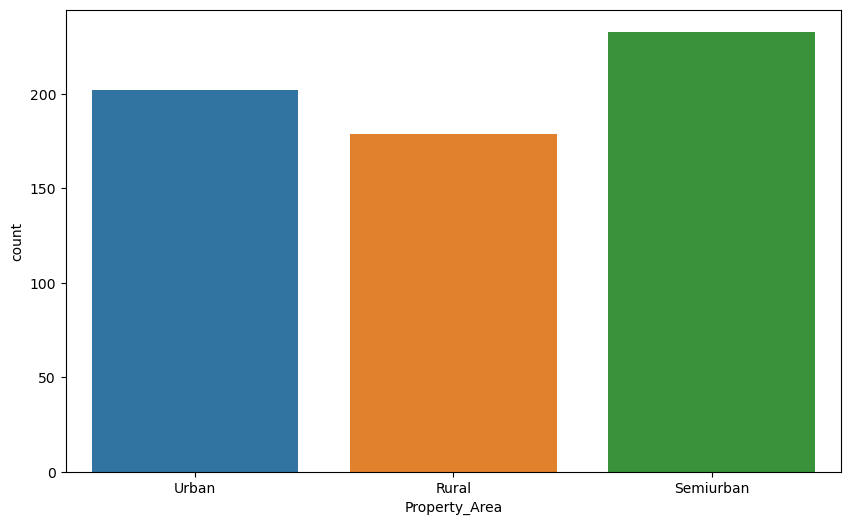

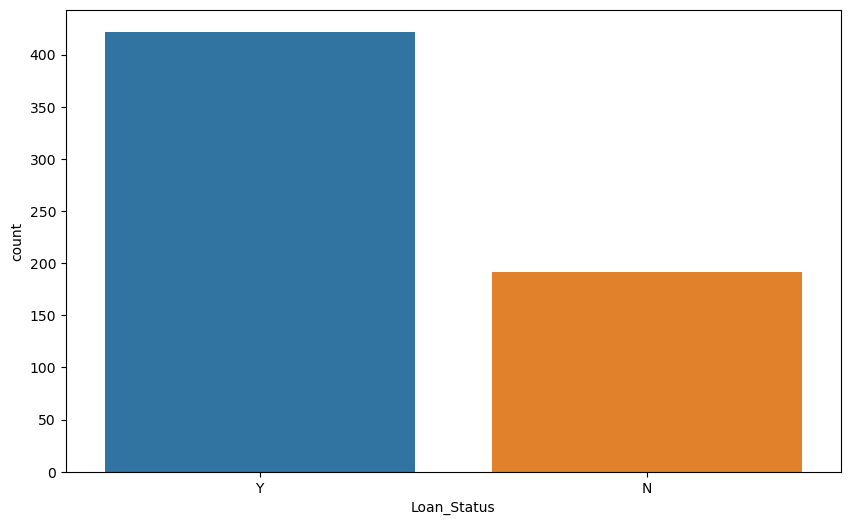

In [69]:
for count in cat.drop('Loan_ID', axis=1):
    plt.figure(figsize=(10,6))
    sns.countplot(x=cat[count])
    plt.show()
    

In [ ]:
# Multivariate analysis

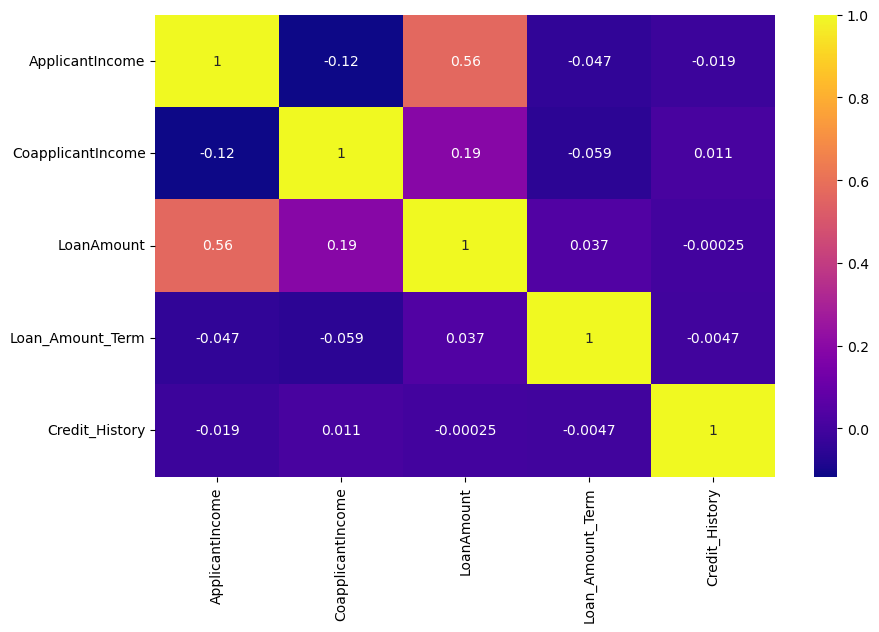

In [70]:
sns.heatmap(df.corr(), annot=True, cmap='plasma')
plt.show()

In [22]:
# Outlier detection 

In [ ]:
# now let's perform the transformation

In [71]:
from sklearn.preprocessing import PowerTransformer

In [72]:
pt = PowerTransformer()

In [73]:

num = pd.DataFrame(pt.fit_transform(num), columns=num.columns)

In [171]:
# Now let's apply scaling

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
sc = StandardScaler()

In [76]:
sc_num = pd.DataFrame(sc.fit_transform(num), columns=num.columns)

In [177]:
# Now let's do the encoding

In [77]:
cat.drop('Loan_ID', axis=1, inplace=True)

In [78]:
cat.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y


In [80]:
gender = pd.get_dummies(cat['Gender'], drop_first=True)

In [81]:
married = pd.get_dummies(cat['Married'], drop_first=True)
education = pd.get_dummies(cat['Education'], drop_first=True)
self_employed = pd.get_dummies(cat['Self_Employed'], drop_first=True)
property_area = pd.get_dummies(cat['Property_Area'], drop_first=True)


In [82]:
new_cat = pd.concat([cat, married, education, self_employed, property_area, gender], axis=1)

In [83]:
new_cat1 = new_cat.drop(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], axis=1)

In [84]:
new_cat1.head(3)

,Dependents,Loan_Status,Yes,Not Graduate,Yes,Semiurban,Urban,Male
0,0,Y,0,0,0,0,1,1
1,1,N,1,0,0,0,0,1
2,0,Y,1,0,1,0,1,1


In [85]:
new_cat1.columns = ['dependent', 'loan_status', 'married', 'not graduate', 'self employed', 'semi urban','urban','gender' ]

In [86]:
df_n = pd.concat([sc_num, new_cat1], axis=1)

In [87]:
from sklearn.preprocessing import LabelEncoder

In [88]:
le = LabelEncoder()

In [94]:
df_n['Loan_Status'] = le.fit_transform(df_n['Loan_Status'])

In [95]:
df_n.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,dependent,loan_status,married,not graduate,self employed,semi urban,urban,gender,Loan_Status
0,0.544331,-1.102837,-0.149985,0.17554,0.411733,0,Y,0,0,0,0,1,1,1
1,0.170974,0.750578,-0.019602,0.17554,0.411733,1,N,1,0,0,0,0,1,0
2,-0.499955,-1.102837,-1.335521,0.17554,0.411733,0,Y,1,0,1,0,1,1,1
3,-0.743873,0.891686,-0.149985,0.17554,0.411733,0,Y,1,1,0,0,1,1,1
4,0.582817,-1.102837,0.176671,0.17554,0.411733,0,Y,0,0,0,0,1,1,1


In [96]:
df_n.drop('loan_status', axis=1, inplace=True)

In [125]:
X = df_n.drop('Loan_Status', axis=1)
y = df_n['Loan_Status']

In [120]:
# Now let's us build the build


In [129]:
from sklearn.model_selection import train_test_split

In [130]:
xtrain, xtest, ytrain, ytest =  train_test_split(X,y, random_state=46, test_size=0.2)

In [131]:
print('xtrain size', xtrain.shape)
print('xtest size', xtest.shape)
print('ytrain size', ytrain.shape)
print('ytest size', ytest.shape)

xtrain size (491, 12)
xtest size (123, 12)
ytrain size (491,)
ytest size (123,)


In [132]:
# let's use the Linear Regression algorithm

In [133]:
from sklearn.linear_model import LinearRegression

In [134]:
Lr = LinearRegression()

In [135]:
lr_model = Lr.fit(xtrain, ytrain)

In [136]:
y_pred = lr_model.predict(xtest)

In [ ]:
# Now let's us check the performance of the model.

In [137]:
from sklearn.metrics import r2_score, mean_squared_error

In [269]:
lin_reg_rsquared = r2_score(ytest, y_pred)

In [270]:
lin_reg_rmse = np.sqrt(mean_squared_error(ytest, y_pred))

In [271]:
# creating an empty dataframe that can hold the model name, and a few metrics
score_card = pd.DataFrame(columns=['Model_Name','R_Squared','RMSE' ])

In [272]:
score_card

,Model_Name,R_Squared,RMSE


In [277]:
linear_reg = pd.Series({
    
                'Model_Name':'Linear_Regression',
                'R_Squared': lin_reg_rsquared,
                'RMSE': lin_reg_rmse
    
    
                        })

score_card = score_card.append(linear_reg, ignore_index=True)

In [278]:
score_card

,Model_Name,R_Squared,RMSE
0,Linear_Regression,0.339333,0.363514
